# Cargar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Cargar datos

In [2]:
# Configura pandas para no usar notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Lee el archivo CSV
df = pd.read_csv('../Data/db/Procesados/data_limpia.csv')
df.head(2)

,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,conina_integral,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Agrupar datos de localización por frecuencia

In [3]:
# Agrupar los datos por la columna 'localizacion' y contar las ocurrencias
conteo_localizacion = df.groupby('localizacion').precio.mean().reset_index()

# Ordenar los datos de mayor a menor según 'precio'
#conteo_localizacion = conteo_localizacion.sort_values(by='precio', ascending=True)

# Mostrar el resultado
print(conteo_localizacion)

                localizacion       precio
0            11 de Noviembre 260000000.00
1                13 de Junio 776000000.00
2        Alameda La Victoria 457500000.00
3         Alameda a Vistoria 485000000.00
4            Almirante Colon 365000000.00
..                       ...          ...
117              Villa Rubia 523000000.00
118             Villa Sandra 600000000.00
119  Villas de la Candelaria 220000000.00
120            Vista Hermosa 360000000.00
121              Zaragocilla 376666666.67

[122 rows x 2 columns]


# Grafica de localización

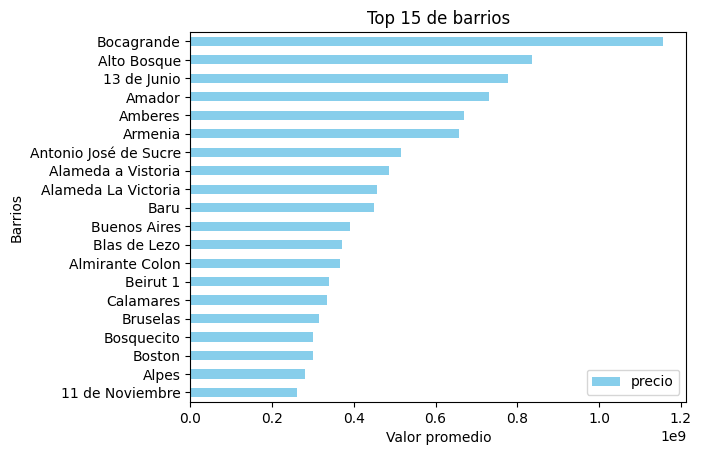

In [4]:
# Creando un gráfico de barras
conteo_localizacion.head(20).sort_values(by='precio', ascending=True).plot(kind='barh', color='skyblue',x='localizacion',y='precio')
# Añadir etiquetas y título
plt.title('Top 15 de barrios')
plt.xlabel('Valor promedio')
plt.ylabel('Barrios')

# Mostrar el gráfico
plt.show()

  CODIGO                NOMBRE  UCG LOC  AREA_HA  PE  POB_BARRIO  TOTAL_HOMB  \
0   0150       DANIEL LEMAITRE 3.00  LH    59.67  P3    17346.00     8506.00   
1   0200           SANTA MARIA 3.00  LH     8.75  P2     5396.00     2634.00   
2   0250              CANAPOTE 3.00  LH    23.60  P2     7750.00     3750.00   
3   0300  SAN PEDRO Y LIBERTAD 2.00  LH    17.19  P2     4440.00     2195.00   
4   0350       SIETE DE AGOSTO 3.00  LH    12.82  P2     6751.00     3295.00   

   TOTAL_MUJE  NO_LEE_ESC                                           geometry  
0     8840.00     1436.00  POLYGON ((842131.215 1645842.043, 842048.374 1...  
1     2762.00      451.00  POLYGON ((842462.954 1646801.211, 842457.697 1...  
2     4000.00      679.00  POLYGON ((841472.83 1646291.422, 841471.824 16...  
3     2245.00      370.00  POLYGON ((841414.301 1646838.488, 841411.788 1...  
4     3456.00      638.00  POLYGON ((842701.018 1646249.319, 842692.207 1...  


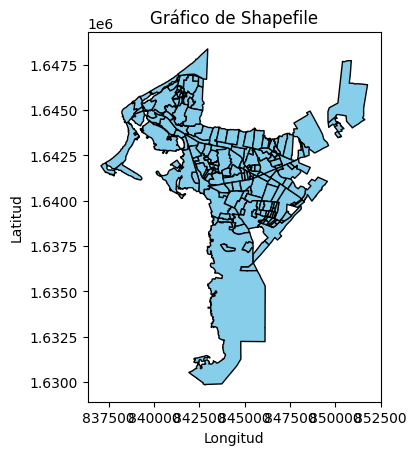

In [5]:
# Lee el archivo .shp
gdf = gpd.read_file('../Data/shapefiles/Barrios/Barrios.shp')
gdf=gdf.iloc[:185]
# Muestra las primeras filas del GeoDataFrame
print(gdf.head())

# Grafica el contenido geoespacial del archivo .shp
gdf.plot(color='skyblue', edgecolor='black')

# Añadir título y etiquetas si es necesario
plt.title('Gráfico de Shapefile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Muestra el gráfico
plt.show()

In [6]:
# Convierte los nombres de localización y NOMBRE a minúsculas
conteo_localizacion['localizacion'] = conteo_localizacion['localizacion'].str.lower()
gdf['NOMBRE'] = gdf['NOMBRE'].str.lower()


In [7]:
print(gdf['NOMBRE'].dtype)
print(conteo_localizacion.index.dtype)


object
int64


In [8]:
# Convertir el índice de conteo_localizacion a cadenas
conteo_localizacion.set_index('localizacion', inplace=True)
conteo_localizacion.index = conteo_localizacion.index.astype(str)

# Realizar el merge
gdf_conteo = gdf.merge(conteo_localizacion, left_on='NOMBRE', right_index=True, how='left')

# Verificar el resultado del merge
print(gdf_conteo)



    CODIGO                    NOMBRE   UCG LOC  AREA_HA  PE  POB_BARRIO  \
0     0150           daniel lemaitre  3.00  LH    59.67  P3    17346.00   
1     0200               santa maria  3.00  LH     8.75  P2     5396.00   
2     0250                  canapote  3.00  LH    23.60  P2     7750.00   
3     0300      san pedro y libertad  2.00  LH    17.19  P2     4440.00   
4     0350           siete de agosto  3.00  LH    12.82  P2     6751.00   
..     ...                       ...   ...  ..      ...  ..         ...   
180   0060            flor del campo  6.00  LV    13.96  P2        0.00   
181   0080       ciudad bicentenario  6.00  LV   402.02  P2        0.00   
182   0070  urbanizacion colombiaton  6.00  LV    13.54  P2        0.00   
183   0090   villas de la candelaria  6.00  LV    17.71  P2        0.00   
184   8970           zona industrial 11.00  LI  1920.24  PC        0.00   

     TOTAL_HOMB  TOTAL_MUJE  NO_LEE_ESC  \
0       8506.00     8840.00     1436.00   
1       2634.

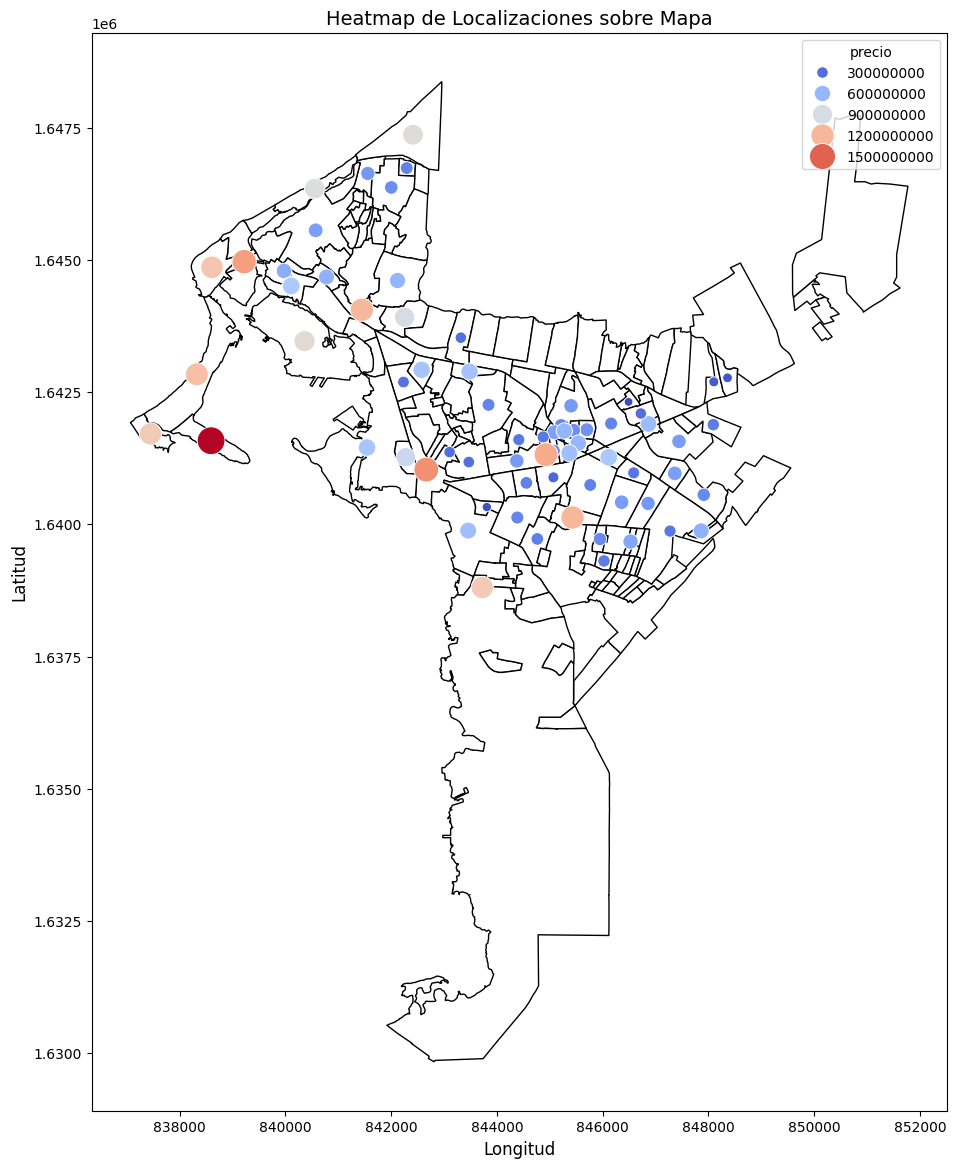

In [9]:
# centroides de geometry
gdf_conteo['geometry'] = gdf_conteo.geometry.centroid
gdf_conteo['x'] = gdf_conteo['geometry'].x
gdf_conteo['y'] = gdf_conteo['geometry'].y

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(18, 14))

# Graficar el shapefile en el fondo (el mapa)
gdf.plot(ax=ax, color='white', edgecolor='black')

# Graficar el heatmap de acuerdo con las ubicaciones (usando las coordenadas del centroide)
sns.scatterplot(x=gdf_conteo['x'], 
                y=gdf_conteo['y'], 
                hue=gdf_conteo['precio'], 
                palette='coolwarm',  # Paleta de colores
                size=gdf_conteo['precio'],  # Tamaño de los puntos según el conteo
                sizes=(40, 400),  # Rango de tamaños de los puntos
                legend=True,  # Desactiva la leyenda si no la necesitas
                ax=ax)  # Usa el mismo eje para superponer el gráfico

# Añadir título y etiquetas
plt.title('Heatmap de Localizaciones sobre Mapa', fontsize=14)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)

# Mostrar el gráfico
plt.show()

In [10]:
print(gdf_conteo[['x', 'y']].head())  # Verifica las primeras coordenadas

          x          y
0 842003.92 1646369.16
1 842295.57 1646735.87
2 841559.65 1646634.11
3 841086.67 1646365.61
4 842578.75 1646533.84


In [11]:
print(gdf_conteo['precio'])

0     415000000.00
1     370000000.00
2     453333333.33
3              NaN
4              NaN
          ...     
180            NaN
181            NaN
182            NaN
183   220000000.00
184            NaN
Name: precio, Length: 186, dtype: float64


In [12]:

# Centroides segun la geometria del mapa
gdf_conteo['geometry'] = gdf_conteo.geometry.centroid
gdf_conteo['x'] = gdf_conteo['geometry'].x
gdf_conteo['y'] = gdf_conteo['geometry'].y

# Reproyectar las coordenadas de UTM a latitud/longitud (EPSG:4326)
gdf_conteo = gdf_conteo.to_crs(epsg=4326)

# Coordenadas para centrar el mapa en Cartagena
map_center = [10.3910, -75.4792]  # Latitud y Longitud de Cartagena
m = folium.Map(location=map_center, zoom_start=12)

# Añadir el shapefile del fondo (si es necesario)
folium.GeoJson(gdf).add_to(m)
gdf_conteo = gdf_conteo.dropna(subset=['precio']) 
# Agregar puntos sobre el mapa (usando los centroides)
for idx, row in gdf_conteo.iterrows():
    folium.CircleMarker(
        location=[row['y'], row['x']],  # Coordenadas del centroide
        radius=row['precio'] / 100000000,  # Tamaño del círculo (ajustar según sea necesario)
        color='blue',  # Color del borde
        fill=True,  # Relleno
        fill_color='coolwarm',  # Color de relleno
        fill_opacity=0.6,  # Transparencia del relleno
    ).add_to(m)

# Añadir HeatMap (opcional, si deseas un mapa de calor)
heat_data = [[row['y'], row['x']] for idx, row in gdf_conteo.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('../Resultados/pdf/mapa.html')

# Mostrar el mapa
m


In [14]:
df['precio'].sum()

410299584792